# DEVALAPALLI HARITHA

LGMVIP - Data science internship

Beginner Level

Task-2  : Stock Market Prediction and Forecasting using Stacked LSTM

Import the libraries and loading the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
path = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [22]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [23]:
print(df.shape)
print(len(df))

(2035, 8)
2035


In [24]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [25]:
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
#sorting the values of data based on date

df.sort_values(by='Date',ignore_index=True,inplace=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [27]:
df_close = df.reset_index()['Close']

In [28]:
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

 plotting the Close value

<AxesSubplot:>

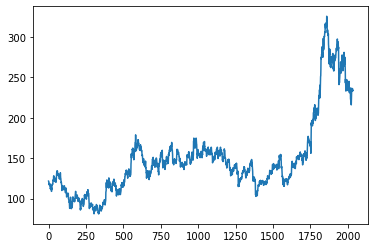

In [29]:
df_close.plot()

# Scaling the input

In [30]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
df1 = scale.fit_transform(np.array(df_close).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Spiltting the data into train and test

In [31]:
#spiltting 
train_size = int(len(df1)*0.80)
test_size = len(df1)-train_size
train_data = df1[0:train_size,:]
test_data = df1[train_size:len(df1),:]

In [32]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.24877451],
       [0.25245098],
       [0.24795752]])

In [34]:
test_data

array([[0.26633987],
       [0.25714869],
       [0.25735294],
       [0.24918301],
       [0.24611928],
       [0.23611111],
       [0.24162582],
       [0.24183007],
       [0.24775327],
       [0.24775327],
       [0.24121732],
       [0.23815359],
       [0.23672386],
       [0.23325163],
       [0.2559232 ],
       [0.24571078],
       [0.25490196],
       [0.25449346],
       [0.25245098],
       [0.24693627],
       [0.24448529],
       [0.22937092],
       [0.23917484],
       [0.24489379],
       [0.26041667],
       [0.26082516],
       [0.26756536],
       [0.26531863],
       [0.25388072],
       [0.28860294],
       [0.28676471],
       [0.27634804],
       [0.28431373],
       [0.28451797],
       [0.28267974],
       [0.28431373],
       [0.28982843],
       [0.29289216],
       [0.29452614],
       [0.28451797],
       [0.28594771],
       [0.29595588],
       [0.28921569],
       [0.28410948],
       [0.27982026],
       [0.2745098 ],
       [0.28288399],
       [0.290

In [35]:
time_step = 100
x_train,y_train = [],[]
for i in range(len(train_data)-time_step-1):
    a = train_data[i:(i+time_step),0]
    x_train.append(a)
    y_train.append(train_data[i+ time_step,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [36]:
x_test,y_test = [],[]
for i in range(len(test_data)-time_step-1):
    b = test_data[i:(i+time_step),0]
    x_test.append(b)
    y_test.append(test_data[i+time_step,0])
x_test,y_test = np.array(x_test),np.array(y_test)

In [37]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100)
Y_train shape : (1527,)
X_test shape  : (306, 100)
Y_test shape  : (306,)


In [38]:
#It is required to reshape into [samples, timestep, features] for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [39]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100, 1)
Y_train shape : (1527,)
X_test shape  : (306, 100, 1)
Y_test shape  : (306,)


In [ ]:
#building the model
#importing the required libraries for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

# plotting the baseline and predictions

In [52]:
len(test_data)

407

In [53]:
x_input = test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

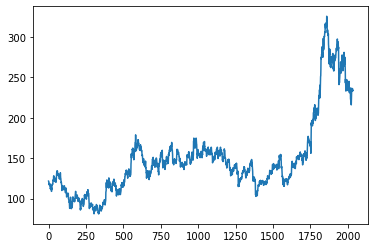

In [58]:
df = df1.tolist()
df.extend(output)
df=scale.inverse_transform(df).tolist()
plt.plot(df)